In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
load_dotenv()
model=ChatGoogleGenerativeAI(model="gemini-2.0-flash-lite")


In [ ]:
#define state
class BlogState(TypedDict):
    title:str 
    outline:str
    content:str


In [ ]:
def create_outline(state:BlogState)->BlogState:
    #extract the question from state
    title=state['title']
    #form a prompt
    prompt=f'generate a detailed outline for a blog on title: {title}'
    #ask the question to the llm
    outline=model.invoke(prompt).content
    #update the state
    state['outline']=outline
    return state

def create_blog(state:BlogState)->BlogState:
    #extract the question from state
    title=state['title']
    outline=state['outline']
    #form a prompt
    prompt=f'generate a detailed blog for a blog on title: {title}, using the following outline \n:{outline}'
    #ask the question to the llm
    content=model.invoke(prompt).content
    #update the state
    state['content']=content
    return state

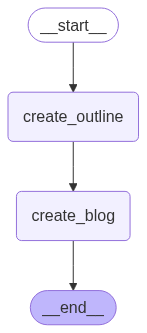

In [ ]:
#create graph
graph=StateGraph(BlogState)

#add nodes
graph.add_node("create_outline",create_outline)
graph.add_node("create_blog",create_blog)

#add edges
graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog',END)

#compile
graph.compile()

In [ ]:
#execute
workflow=graph.compile()

workflow.invoke({
    'title': 'India under tariffs',
})['title']


KeyError: 'title'